In [14]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

from http://fa.bianp.net/blog/tag/linear-algebra.html

In [19]:
from matplotlib import animation
from JSAnimation import IPython_display

In [7]:
def house(x):
    """
    Given a vetor x, computes vectors v with v[0] = 1
    and scalar beta such that P = I - beta v v^T
    is orthogonal and P x = ||x|| e_1

    Parameters
    ----------
    x : array, shape (n,) or (n, 1)

    Returns
    -------
    beta : scalar
    v : array, shape (n, 1)
    """
    x = np.asarray(x)
    if x.ndim == 1:
        x = x[:, np.newaxis]
    sigma = linalg.norm(x[1:, 0]) ** 2
    v = np.vstack((1, x[1:]))
    if sigma == 0:
        beta = 0
    else:
        mu = np.sqrt(x[0, 0] ** 2 + sigma)
        if x[0, 0] <= 0:
            v[0, 0] = x[0, 0] - mu
        else:
            v[0, 0] = - sigma / (x[0, 0] + mu)
        beta = 2 * (v[0, 0] ** 2) / (sigma + v[0, 0] ** 2)
        v /= v[0, 0]
    return beta, v

In [6]:
n = 5
np.random.seed(0)
x = np.random.randn(n)
beta, v = house(x)
P = np.eye(n) - beta * np.dot(v, v.T)
print(np.round(P.dot(x) / linalg.norm(x), decimals=15))

[ 1.  0.  0.  0.  0.]


QR decomposition using Householder reflections. To generate the animated gif from the saved pictures I run the command-line <code>convert -delay 30 -loop 0 house_*.png house.gif</code>

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

In [34]:
mat1 = ax.matshow(X)
mat1.set_data(X + 5)

In [26]:
?ax.matshow


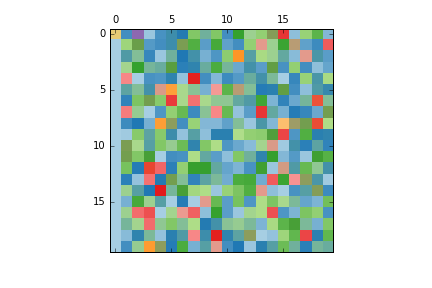
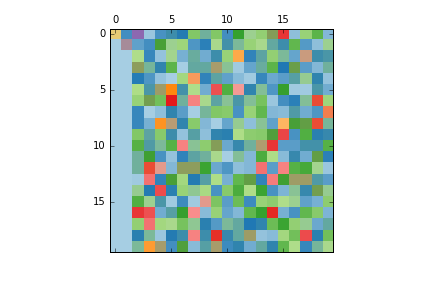
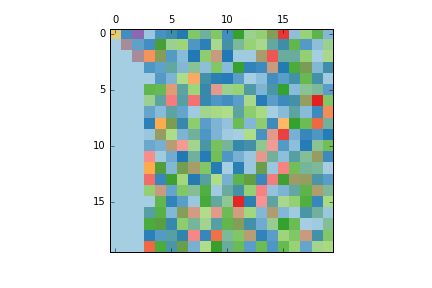
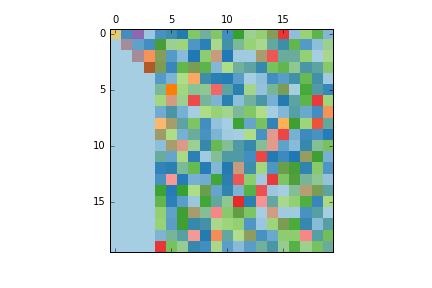
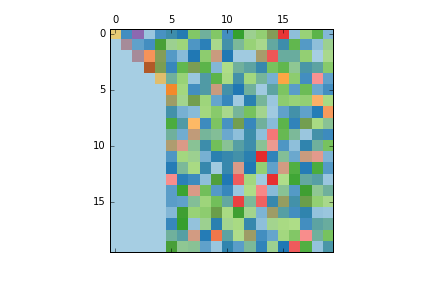
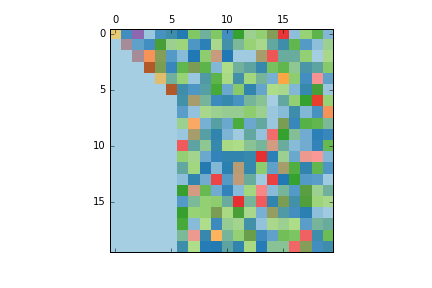
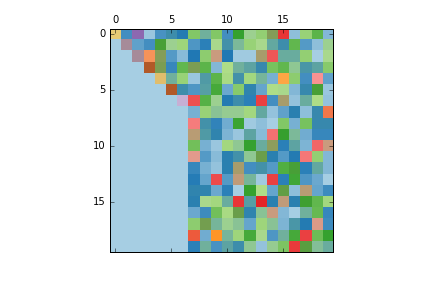
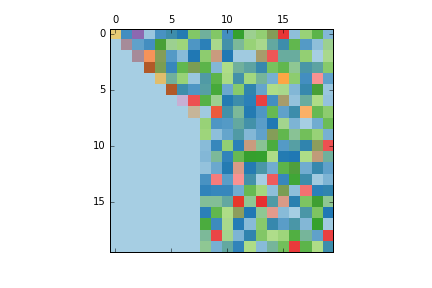
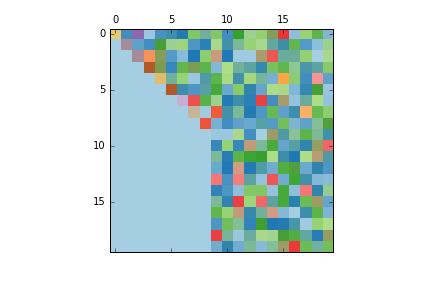
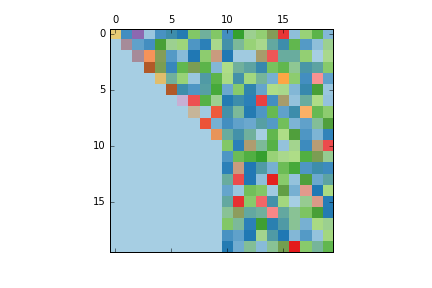
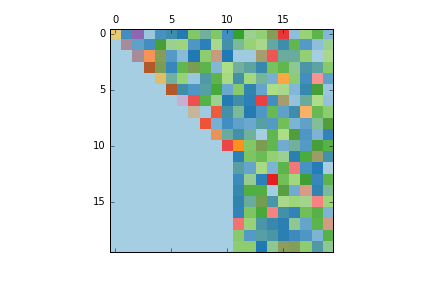
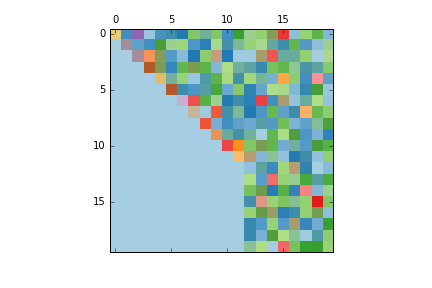
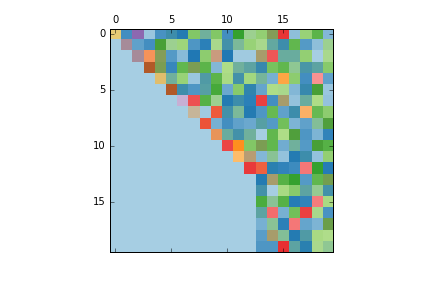
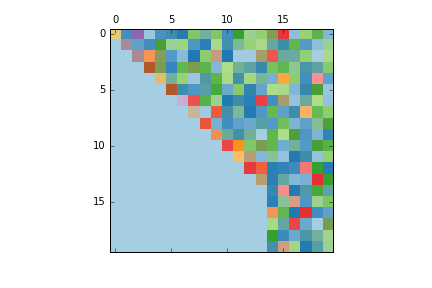
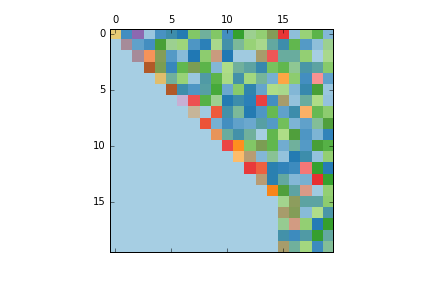
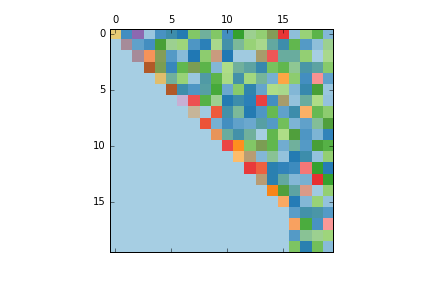
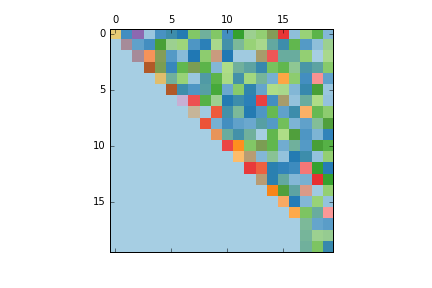
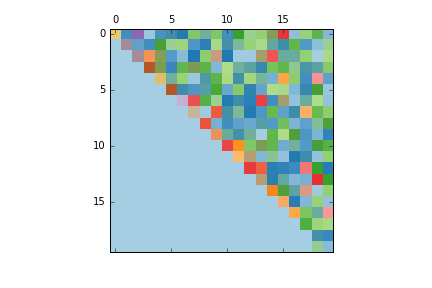
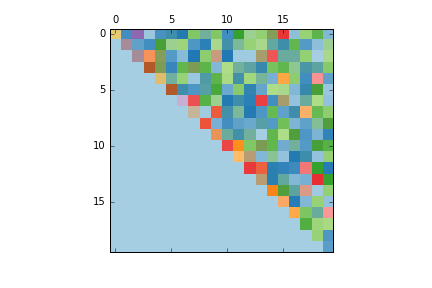

In [44]:
n = 20
X = np.random.randn(n, n)

#plt.matshow(np.abs(X), cmap=pl.cm.Paired, vmax=5.)

fig = plt.figure()
ax = plt.axes()
mat1 = ax.matshow(X, cmap=pl.cm.Paired, vmax=5.)
X_0 = X.copy()

def init():
    global X_0
    mat1.set_data(np.abs(X))
    X_0 = X.copy()
    return mat1,

def animate(i):
    global X_0
    #title = ('P_{%s} ' % i) + title
    beta, v = house(X_0[i:, i])
    P = np.eye(X.shape[1])
    P[i:, i:] = np.eye(n - i) - beta * np.dot(v, v.T)
    X_0 = P.dot(X_0)
    mat1.set_data(np.abs(X_0))
    return mat1,
    #plt.matshow(np.abs(X_0), cmap=pl.cm.Paired, vmax=5.)
    #fig = plt.gcf()
    #fig.set_size_inches(8.5,6.0)
    #plt.title('$' + title + '$', fontsize='xx-large',x =1., ha='right')
    #plt.axis('off')
    #plt.colorbar()

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=X.shape[1] -1, interval=500)

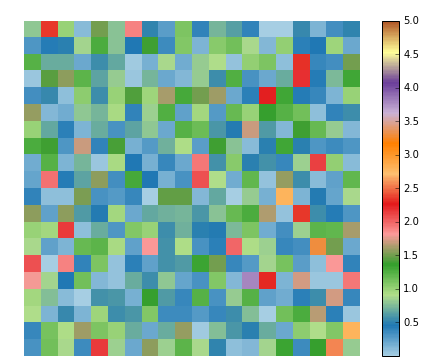

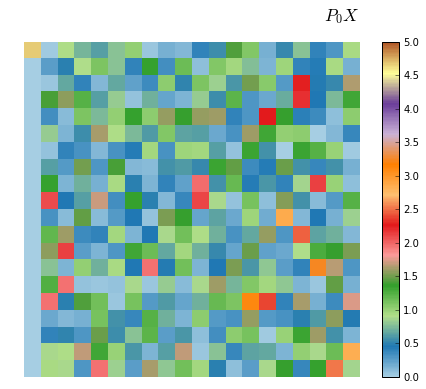

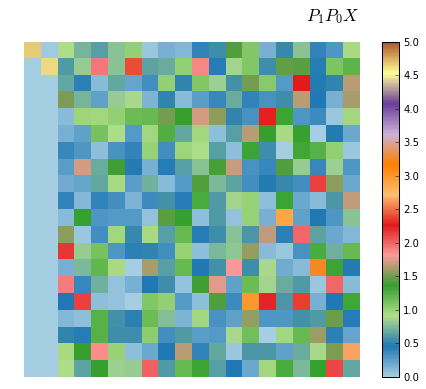

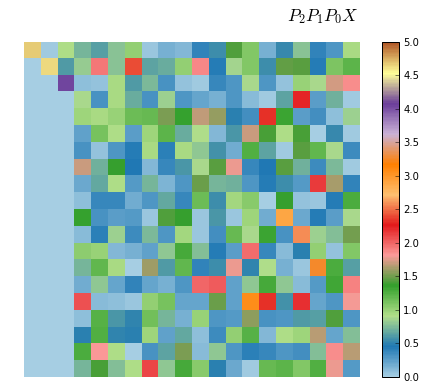

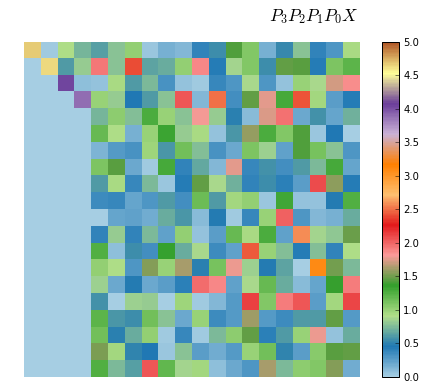

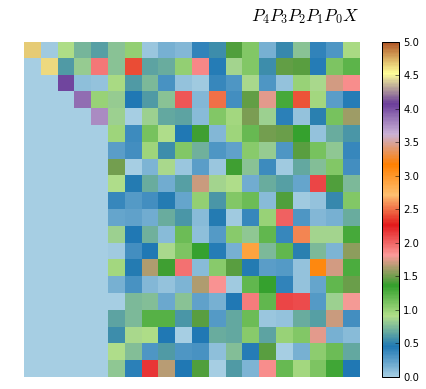

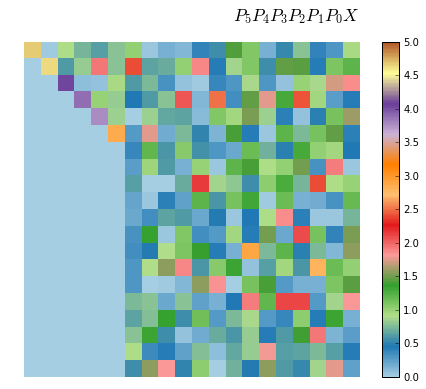

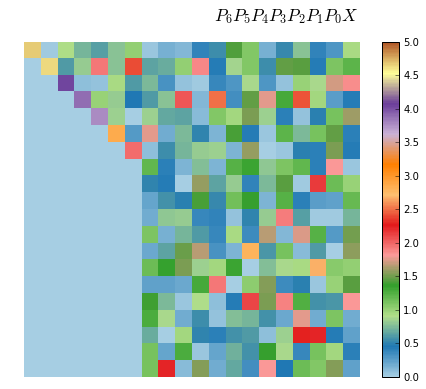

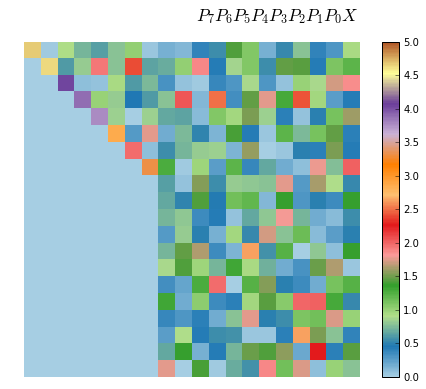

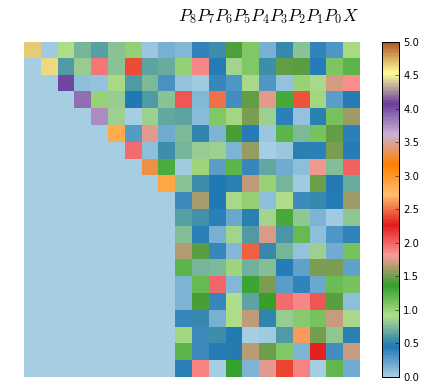

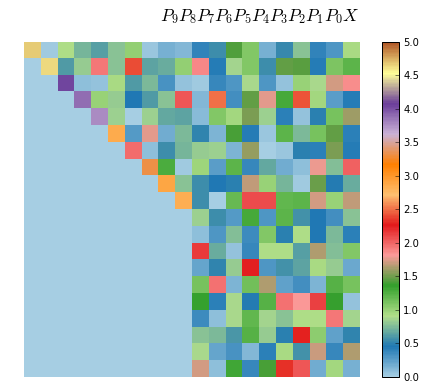

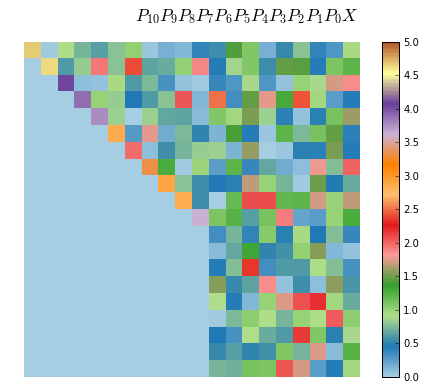

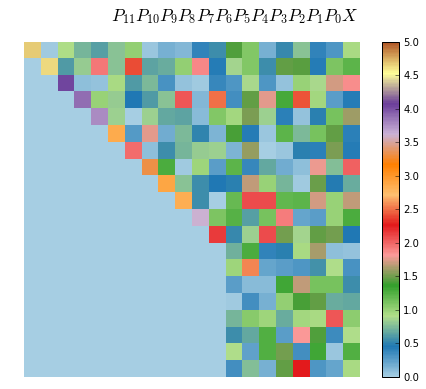

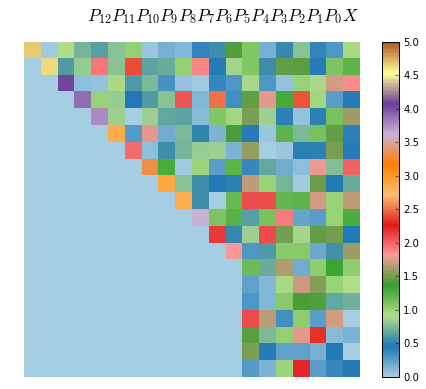

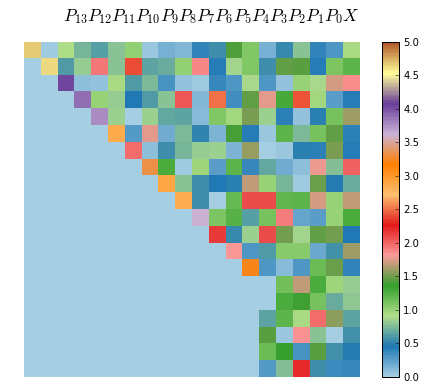

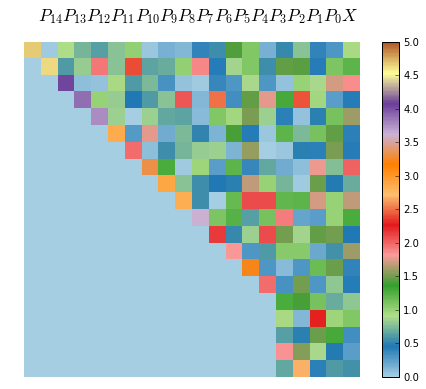

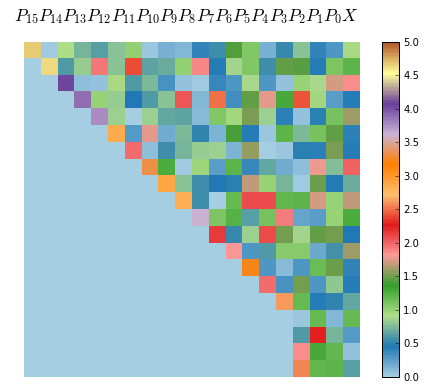

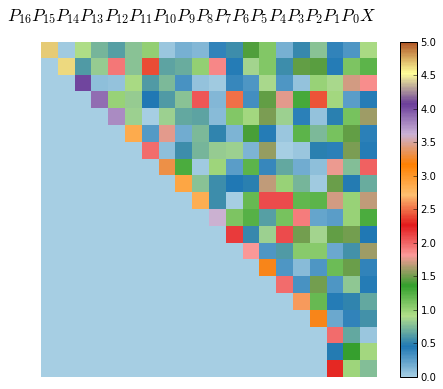

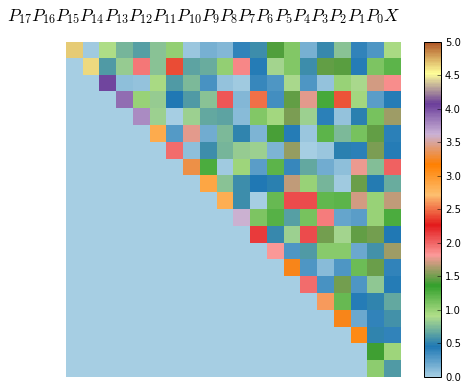

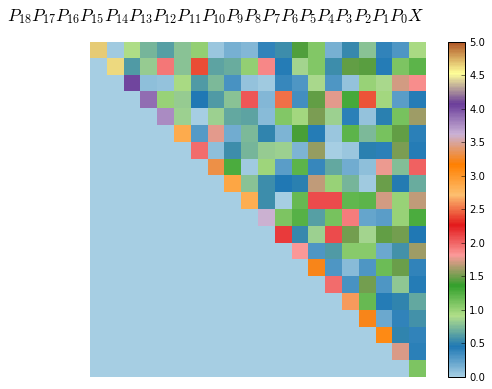

In [35]:
n = 20
X = np.random.randn(n, n)

plt.matshow(np.abs(X), cmap=pl.cm.Paired, vmax=5.)
fig = plt.gcf()
fig.set_size_inches(8.5,6.0)
plt.axis('off')
plt.colorbar()
plt.savefig('house_random.png')
X_0 = X.copy()
title = 'X'
for i in range(X.shape[1] -1):
    title = ('P_{%s} ' % i) + title
    beta, v = house(X_0[i:, i])
    P = np.eye(X.shape[1])
    P[i:, i:] = np.eye(n - i) - beta * np.dot(v, v.T)
    X_0 = P.dot(X_0)
    plt.matshow(np.abs(X_0), cmap=pl.cm.Paired, vmax=5.)
    fig = plt.gcf()
    fig.set_size_inches(8.5,6.0)
    plt.title('$' + title + '$', fontsize='xx-large',x =1., ha='right')
    plt.axis('off')
    plt.colorbar()
    #plt.savefig('house_%03d.png' % i)

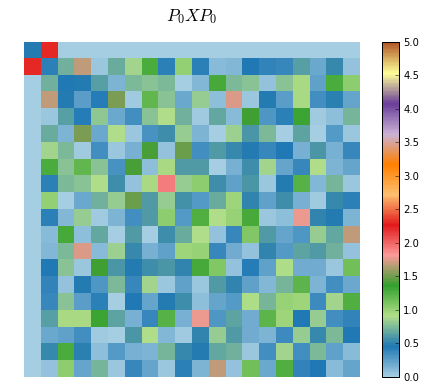

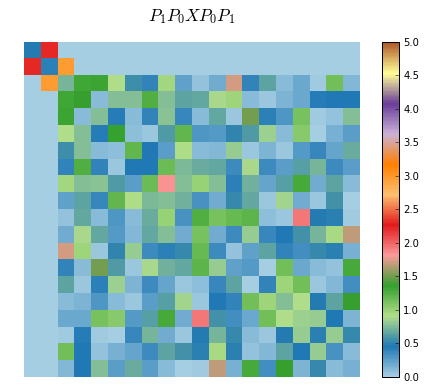

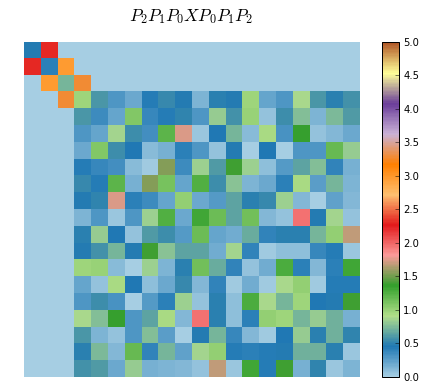

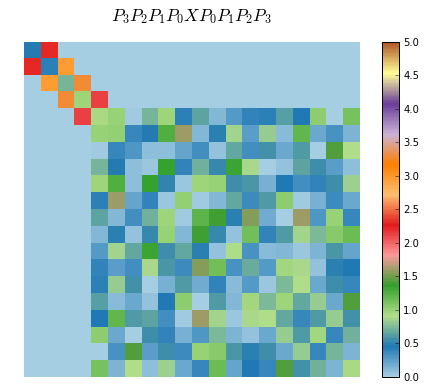

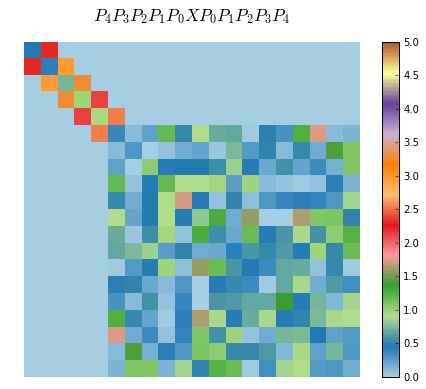

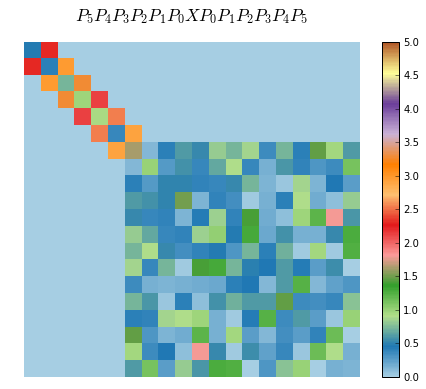

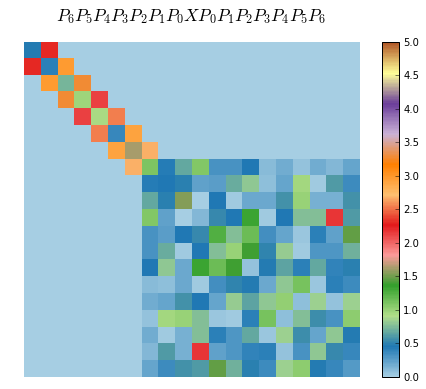

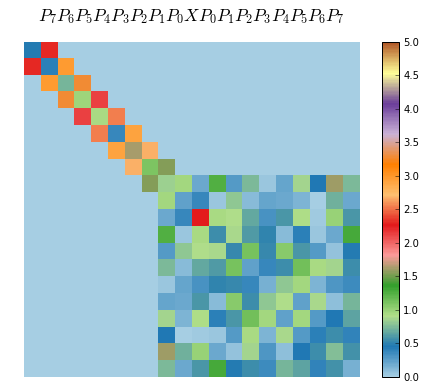

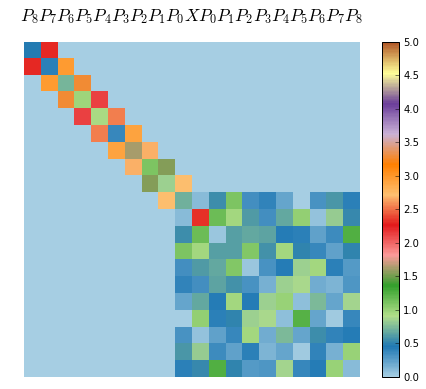

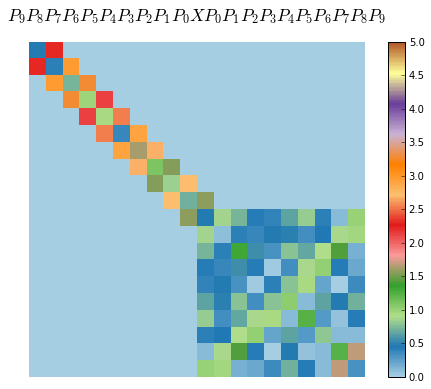

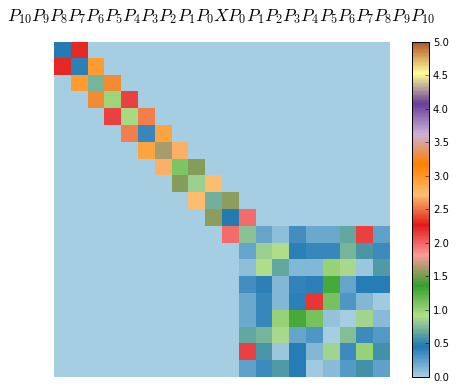

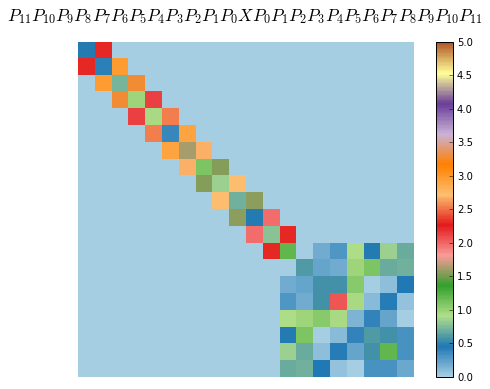

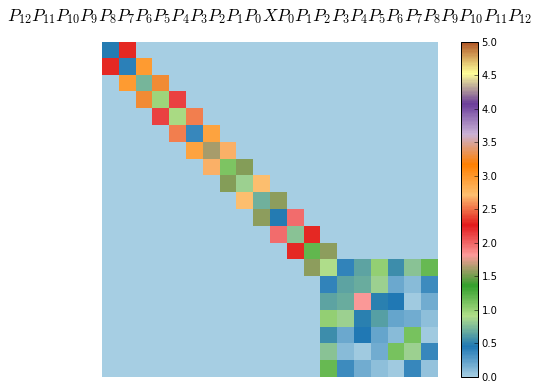

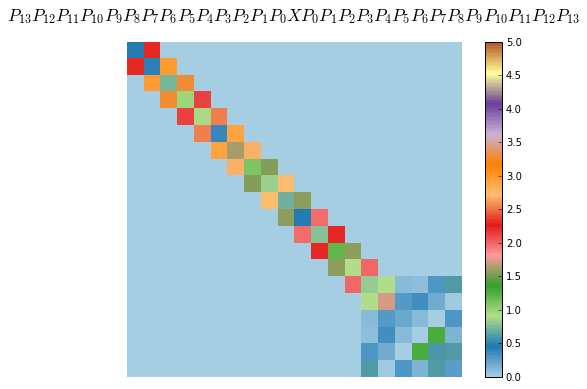

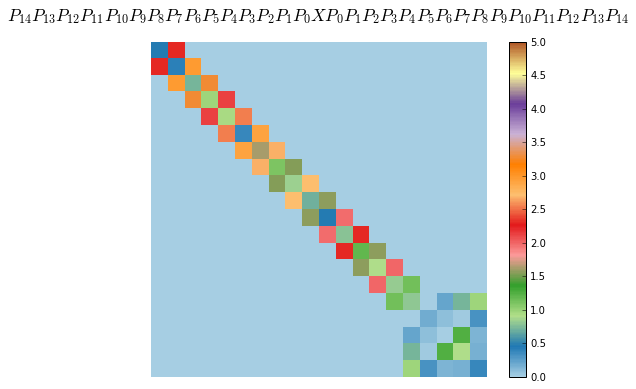

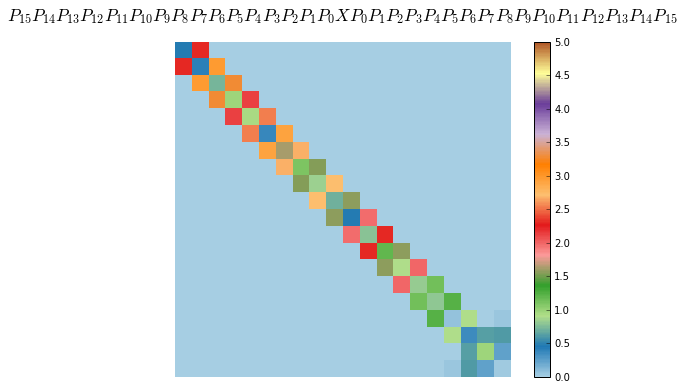

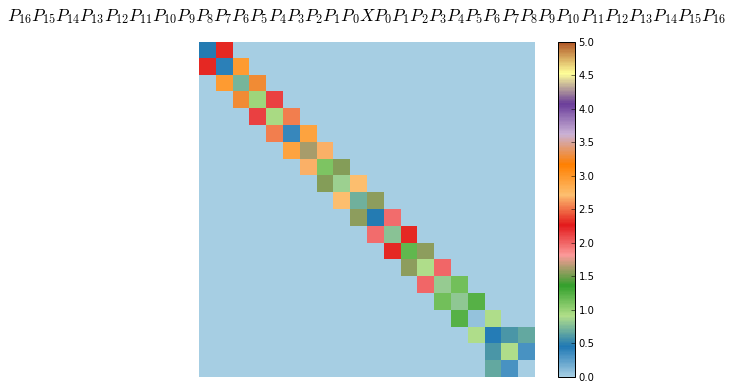

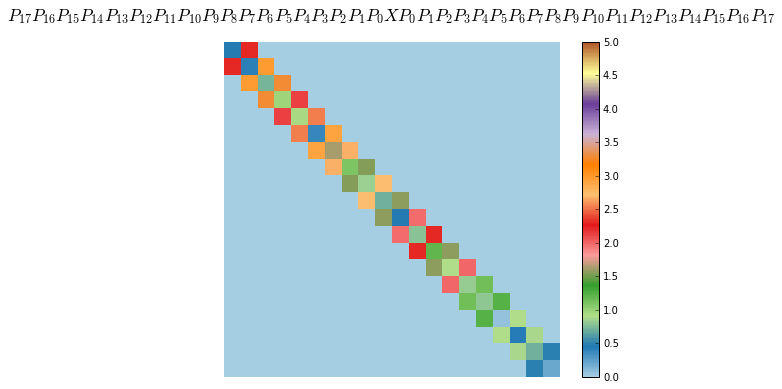

In [20]:
X = (X + X.T) / 2.

X_0 = X.copy()
title = 'X'
for i in range(X.shape[1] - 2):
    title = ('P_{%s} ' % i) + title + ('P_{%s} ' % i)
    beta, v = house(X_0[i+1:, i])
    P = np.eye(X.shape[1])
    P[i+1:, i+1:] = np.eye(n - i - 1) - beta * np.dot(v, v.T)
    X_0 = P.T.dot(X_0).dot(P)
    plt.matshow(np.abs(X_0), cmap=pl.cm.Paired, vmax=5.)
    fig = plt.gcf()
    fig.set_size_inches(8.5,6.0)
    plt.title('$' + title + '$', fontsize='xx-large',x =.5, ha='center')
    plt.axis('off')
    plt.colorbar()
    plt.savefig('house_tridiag_%03d.png' % i)